In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import pickle
import numpy as np

from sklearn.model_selection import train_test_split
import sklearn.metrics as metrics
from sklearn.linear_model import LogisticRegression
import seaborn as sns

In [2]:
PATH = 'Crop_recommendation (1).csv'

# Load the CSV file data into
# data variable using pandas
data = pd.read_csv(PATH)

In [3]:
data.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB


In [5]:
# describe
data.describe()

,N,P,K,temperature,humidity,ph,rainfall
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,50.551818,53.362727,48.149091,25.616244,71.481779,6.469480,103.463655
std,36.917334,32.985883,50.647931,5.063749,22.263812,0.773938,54.958389
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,20.211267
25%,21.000000,28.000000,20.000000,22.769375,60.261953,5.971693,64.551686
50%,37.000000,51.000000,32.000000,25.598693,80.473146,6.425045,94.867624
75%,84.250000,68.000000,49.000000,28.561654,89.948771,6.923643,124.267508
max,140.000000,145.000000,205.000000,43.675493,99.981876,9.935091,298.560117


In [6]:
data['label'].unique()

array(['rice', 'maize', 'chickpea', 'kidneybeans', 'pigeonpeas',
       'mothbeans', 'mungbean', 'blackgram', 'lentil', 'pomegranate',
       'banana', 'mango', 'grapes', 'watermelon', 'muskmelon', 'apple',
       'orange', 'papaya', 'coconut', 'cotton', 'jute', 'coffee'],
      dtype=object)

In [7]:
data['label'].value_counts()

,count
label,
rice,100
maize,100
jute,100
cotton,100
coconut,100
papaya,100
orange,100
apple,100
muskmelon,100


<ipython-input-8-b7e3deb8c8a9>:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[feat], color='greenyellow')
<ipython-input-8-b7e3deb8c8a9>:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[feat], color='greenyellow')
<ipython-input-8-b7e3deb8c8a9>:9: UserWarning: 

`distplot` is a depre

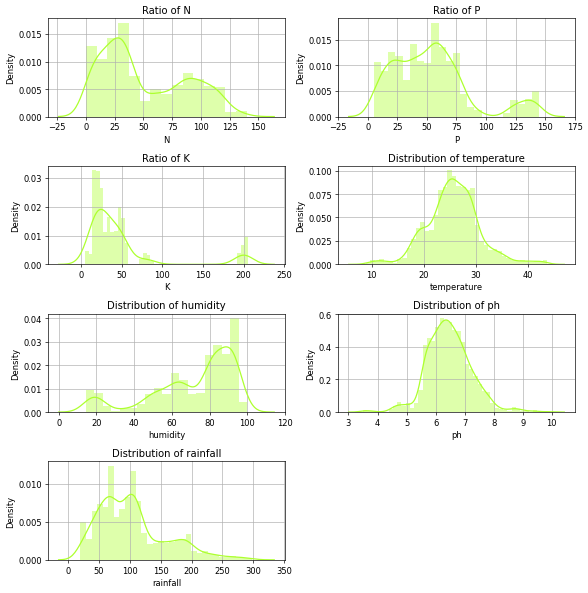

In [8]:
plt.rcParams['figure.figsize'] = (10, 10)
plt.rcParams['figure.dpi'] = 60

features = ['N', 'P', 'K', 'temperature',
            'humidity', 'ph', 'rainfall']

for i, feat in enumerate(features):
    plt.subplot(4, 2, i + 1)
    sns.distplot(data[feat], color='greenyellow')
    if i < 3:
        plt.title(f'Ratio of {feat}', fontsize=12)
    else:
        plt.title(f'Distribution of {feat}', fontsize=12)
    plt.tight_layout()
    plt.grid()

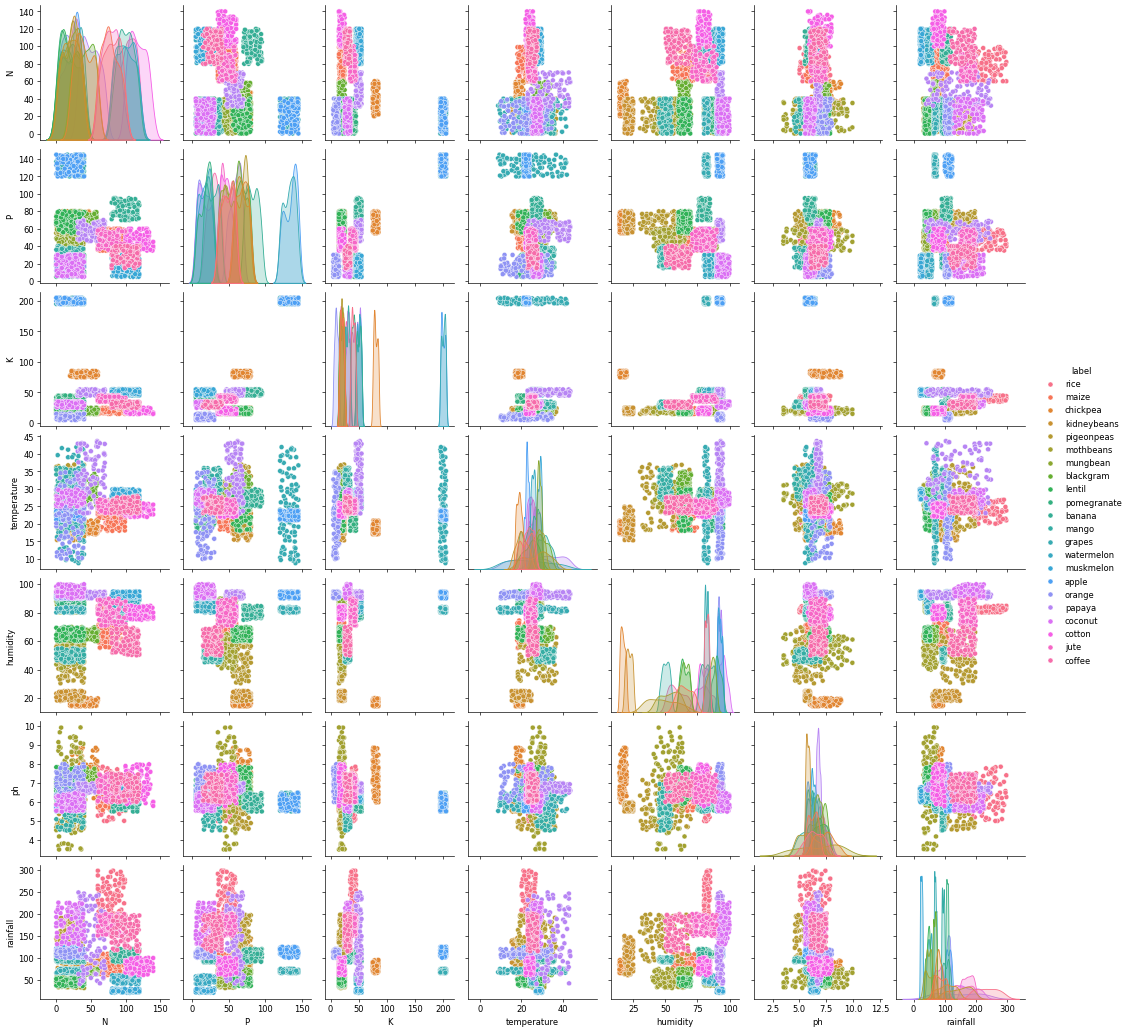

In [9]:
sns.pairplot(data, hue='label')

In [10]:
features = data[['N', 'P', 'K', 'temperature',
                 'humidity', 'ph', 'rainfall']]

# Put all the output into labels array
labels = data['label']

In [11]:
X_train, X_test,Y_train, Y_test = train_test_split(features,
                                       labels,
                                       test_size=0.2,
                                       random_state=42)

In [12]:
LogReg = LogisticRegression(random_state=42).fit(X_train, Y_train)

# Predict the values for the test dataset
predicted_values = LogReg.predict(X_test)

# Measure the accuracy of the test
# set using accuracy_score metric
accuracy = metrics.accuracy_score(Y_test,
                                  predicted_values)
print(X_test)

        N    P    K  temperature   humidity        ph    rainfall
1451  101   17   47    29.494014  94.729813  6.185053   26.308209
1334   98    8   51    26.179346  86.522581  6.259336   49.430510
1761   59   62   49    43.360515  93.351916  6.941497  114.778071
1735   44   60   55    34.280461  90.555616  6.825371   98.540477
1576   30  137  200    22.914300  90.704756  5.603413  118.604465
...   ...  ...  ...          ...        ...       ...         ...
59     99   55   35    21.723831  80.238990  6.501698  277.962619
71     67   45   38    22.727910  82.170688  7.300411  260.887506
1908  121   47   16    23.605640  79.295731  7.723240   72.498009
1958  116   52   19    22.942767  75.371706  6.114526   67.080226
482     5   68   20    19.043805  33.106951  6.121667  155.370562

[440 rows x 7 columns]


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [13]:
print("Logistic Regression accuracy: ", accuracy)

Logistic Regression accuracy:  0.9454545454545454


In [14]:
print(metrics.classification_report(Y_test,
                                    predicted_values))

              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        23
      banana       0.95      1.00      0.98        21
   blackgram       0.83      0.75      0.79        20
    chickpea       1.00      1.00      1.00        26
     coconut       1.00      1.00      1.00        27
      coffee       0.94      1.00      0.97        17
      cotton       0.80      0.94      0.86        17
      grapes       1.00      1.00      1.00        14
        jute       0.91      0.87      0.89        23
 kidneybeans       1.00      0.95      0.97        20
      lentil       0.83      0.91      0.87        11
       maize       0.94      0.76      0.84        21
       mango       0.95      1.00      0.97        19
   mothbeans       0.85      0.92      0.88        24
    mungbean       0.95      1.00      0.97        19
   muskmelon       1.00      1.00      1.00        17
      orange       1.00      1.00      1.00        14
      papaya       0.95    

In [15]:
N = 23
P = 56
k = 78
temperature = 40
humidity = 200
ph = 7
rainfall = 250

predict = LogReg.predict([[N, P, k, temperature, humidity, ph, rainfall]])
print(predict)

['pomegranate']


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
